<a href="https://colab.research.google.com/github/bavendanom/Se-ales_y_sistemas_bavendanom/blob/se%C3%B1ales-y-sistemas/TALLER_1/EJER1_1T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

A = 1 #amplitud 
Fo = 60 # frecuencia
To = 1/Fo #periodo fundamental
Fs = 32*Fo #frecuencia de muestreo 
ti = 0 #tiempo inicial 
tf = To #tiempo final 
Ts = 1/Fs #tiempo de muestreo
tn = np.arange(ti,tf,Ts) #vector de datos en el tiempo 
x = A*np.sin(2*np.pi*Fo*tn)

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto 
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
y = my_ceropen(x,0,10) #se llama la función definida en la celda anterior

<ipython-input-5-4cd8a9a0b8e8>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(tn,y,'b-')


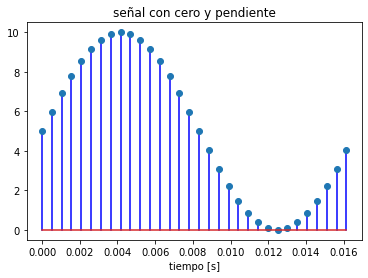

In [ ]:
plt.stem(tn,y,'b-')
plt.xlabel('tiempo [s]')
plt.title('señal con cero y pendiente')
plt.show()

In [ ]:
def anlog_digit(y,bits=3,rmin=0,rmax=5):
  nbits = 3
  rmin = 0
  rmax = 10
  ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax
  d = cdist(y.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
  d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve
  ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
  xx=ve[ind]
  return xx


In [ ]:
ya=anlog_digit(y,3,0,10)

<ipython-input-8-35e9fe01407d>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(tn,ya,'b-')


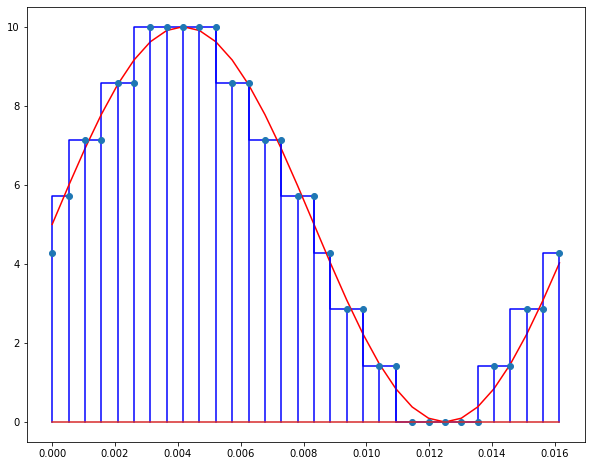

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(tn,ya,'b-', drawstyle='steps-pre',)
plt.plot(tn,y,'r')
plt.stem(tn,ya,'b-')
plt.show()